# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['timezone'] # ??? use timezone in combination with unix timestamp ???

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": int(time.time())})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tobelo
Processing Record 2 of Set 1 | hayma'
City not found. Skipping...
Processing Record 3 of Set 1 | nola
Processing Record 4 of Set 1 | cidreira
Processing Record 5 of Set 1 | noumea
Processing Record 6 of Set 1 | katsuura
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | luderitz
Processing Record 10 of Set 1 | fort leonard wood
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | meadow lakes
Processing Record 13 of Set 1 | nantucket
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | pandan
Processing Record 16 of Set 1 | valparaiso
Processing Record 17 of Set 1 | afaahiti
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | margaret river
Processing Record 20 of Set 1 | ovalle
Processing Record 21 of Set 1 | eskhar
Processing Record 22 of Set 1 | ba

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tobelo,1.7284,128.0095,26.25,82,81,1.53,ID,1699908388
1,nola,40.9220,14.5329,18.29,92,80,1.46,IT,1699908389
2,cidreira,-30.1811,-50.2056,20.81,96,100,0.87,BR,1699908389
3,noumea,-22.2763,166.4572,23.89,99,84,5.73,NC,1699908389
4,katsuura,35.1333,140.3000,10.39,52,2,3.78,JP,1699908389


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tobelo,1.7284,128.0095,26.25,82,81,1.53,ID,1699908388
1,nola,40.9220,14.5329,18.29,92,80,1.46,IT,1699908389
2,cidreira,-30.1811,-50.2056,20.81,96,100,0.87,BR,1699908389
3,noumea,-22.2763,166.4572,23.89,99,84,5.73,NC,1699908389
4,katsuura,35.1333,140.3000,10.39,52,2,3.78,JP,1699908389


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [13]:
date = time.strftime("%Y-%m-%d", time.localtime())

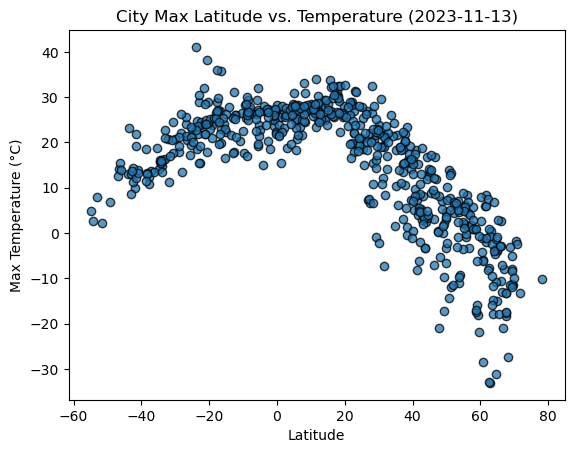

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f'City Max Latitude vs. Temperature ({date})')
plt.ylabel('Max Temperature (°C)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

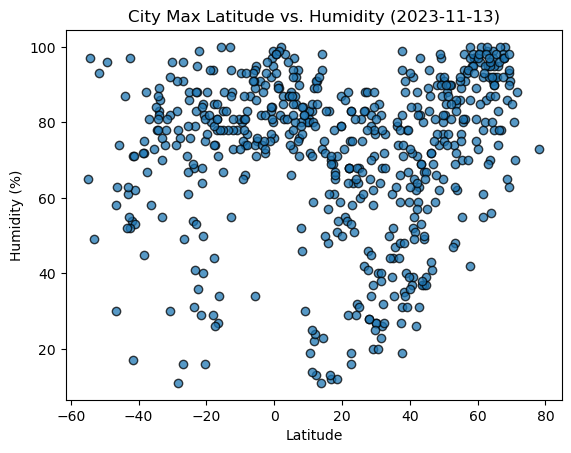

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors="black", alpha=0.75)


# Incorporate the other graph properties
plt.title(f'City Max Latitude vs. Humidity ({date})')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

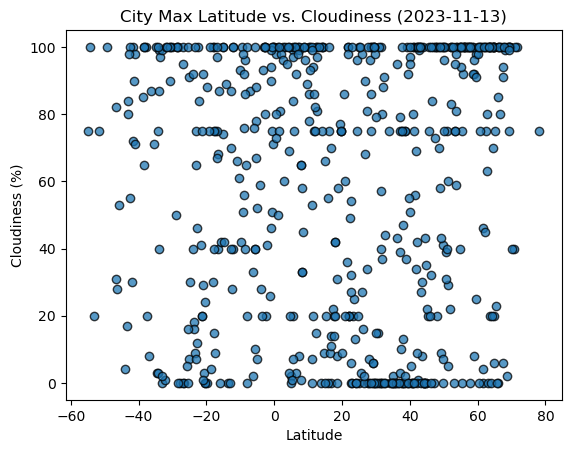

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f'City Max Latitude vs. Cloudiness ({date})')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

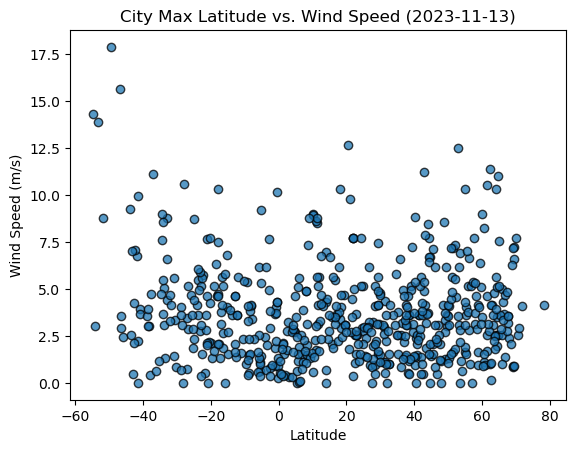

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f'City Max Latitude vs. Wind Speed ({date})')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [45]:
# Define a function to create Linear Regression plots
def calculate_linereg(x, y, annotate_x_pos, annotate_y_pos, xlabel, ylabel):
    
    # Define axis data
    x_values = x
    y_values = y
    
    # Calculate linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(annotate_x_pos,annotate_y_pos),fontsize=15,color="red") # bestpos?
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    print(f'r-value: {rvalue}')


In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tobelo,1.7284,128.0095,26.25,82,81,1.53,ID,1699908388
1,nola,40.9220,14.5329,18.29,92,80,1.46,IT,1699908389
4,katsuura,35.1333,140.3000,10.39,52,2,3.78,JP,1699908389
8,fort leonard wood,37.7057,-92.1572,21.96,19,0,4.12,US,1699908390
10,meadow lakes,61.6247,-149.6011,-1.87,92,100,1.68,US,1699908390


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,cidreira,-30.1811,-50.2056,20.81,96,100,0.87,BR,1699908389
3,noumea,-22.2763,166.4572,23.89,99,84,5.73,NC,1699908389
5,ushuaia,-54.8000,-68.3000,4.81,65,75,14.31,AR,1699908389
6,bredasdorp,-34.5322,20.0403,15.79,78,3,7.62,ZA,1699908389
7,luderitz,-26.6481,15.1594,20.58,49,0,5.16,NaN,1699908389


###  Temperature vs. Latitude Linear Regression Plot

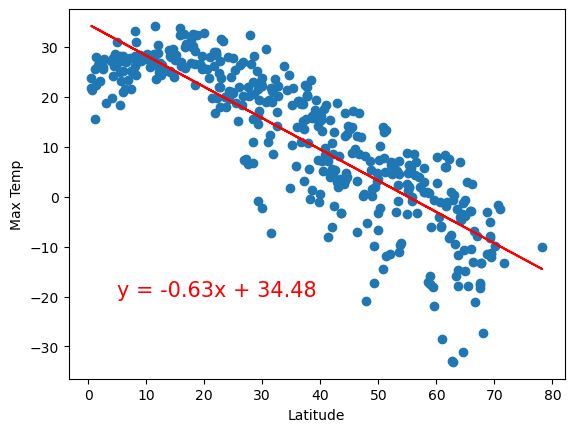

r-value: -0.8541613146990018


In [46]:
# Linear regression on Northern Hemisphere
calculate_linereg(x=northern_hemi_df['Lat'], y=northern_hemi_df['Max Temp'], annotate_x_pos=5, annotate_y_pos=-20, xlabel='Latitude', ylabel='Max Temp')

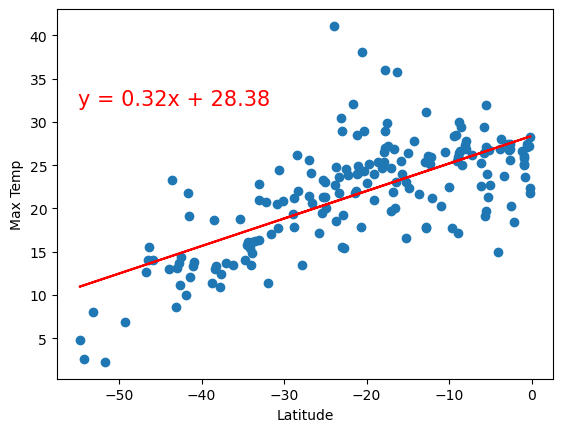

r-value: 0.6915242023011924


In [47]:
# Linear regression on Southern Hemisphere
calculate_linereg(x=southern_hemi_df['Lat'], y=southern_hemi_df['Max Temp'], annotate_x_pos=-55, annotate_y_pos=32, xlabel='Latitude', ylabel='Max Temp')


**Discussion about the linear relationship:** These plots look at the correlation of 'Max Temp' and 'Latitude. The Northern Hemisphere exhibits a strong negative correlation while the Southern Hemisphere exhibits a moderate positive correlation. Combining this data would suggest that there is a moderate-strong positive correlation of higher temperatures as latitude samples approach the equator (lat 0)

### Humidity vs. Latitude Linear Regression Plot

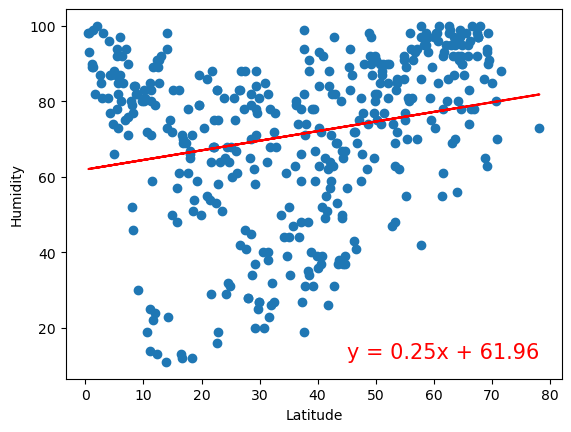

r-value: 0.2313422477132408


In [48]:
# Northern Hemisphere
calculate_linereg(x=northern_hemi_df['Lat'], y=northern_hemi_df['Humidity'], annotate_x_pos=45, annotate_y_pos=12, xlabel='Latitude', ylabel='Humidity')

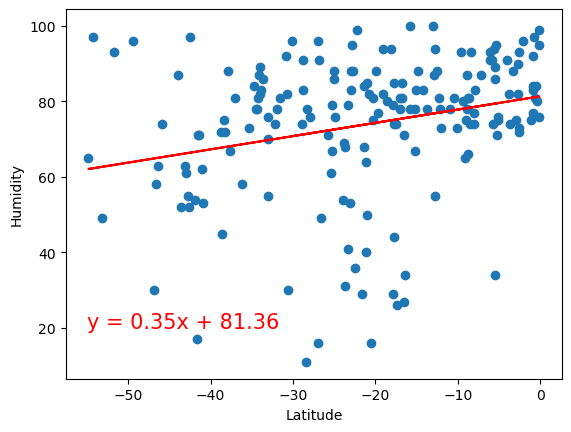

r-value: 0.2591872790741771


In [49]:
# Southern Hemisphere
calculate_linereg(x=southern_hemi_df['Lat'], y=southern_hemi_df['Humidity'], annotate_x_pos=-55, annotate_y_pos=20, xlabel='Latitude', ylabel='Humidity')


**Discussion about the linear relationship:** The northern and southern hemisphere plots both exhibit weak positive correlation. Considered in combination to consider the effect as one approaches the equator, these graphs show no correlation between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

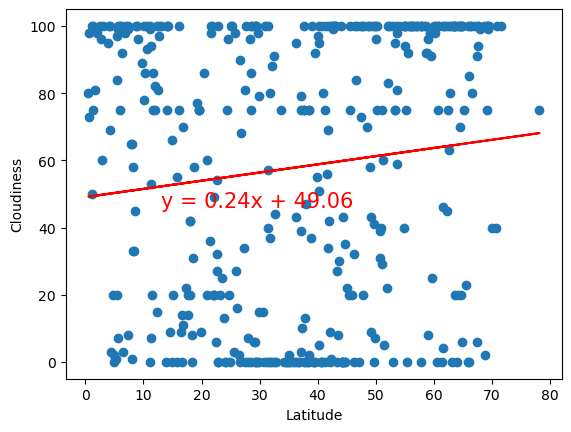

r-value: 0.11947187143716993


In [50]:
# Northern Hemisphere
calculate_linereg(x=northern_hemi_df['Lat'], y=northern_hemi_df['Cloudiness'], annotate_x_pos=13, annotate_y_pos=46, xlabel='Latitude', ylabel='Cloudiness')

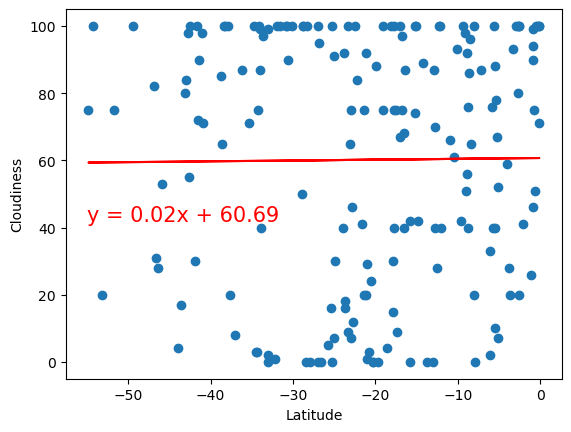

r-value: 0.009331641712736576


In [51]:
# Southern Hemisphere
calculate_linereg(x=southern_hemi_df['Lat'], y=southern_hemi_df['Cloudiness'], annotate_x_pos=-55, annotate_y_pos=42, xlabel='Latitude', ylabel='Cloudiness')


**Discussion about the linear relationship:** The northern hemisphere shows very weak positive correlation while the southern shows no correlation. In combination, they show no correlation of cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

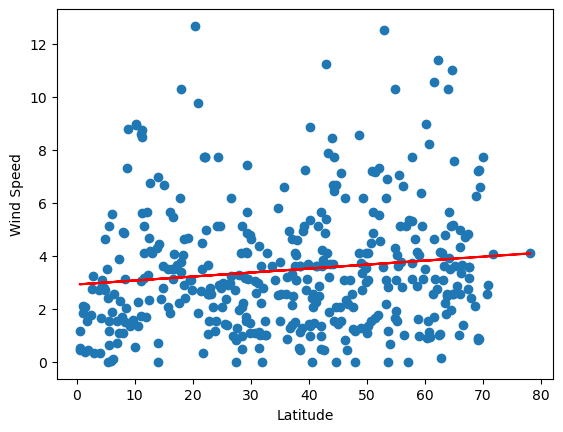

r-value: 0.12637509331032248


In [52]:
# Northern Hemisphere
calculate_linereg(x=northern_hemi_df['Lat'], y=northern_hemi_df['Wind Speed'], annotate_x_pos=5, annotate_y_pos=-10, xlabel='Latitude', ylabel='Wind Speed')

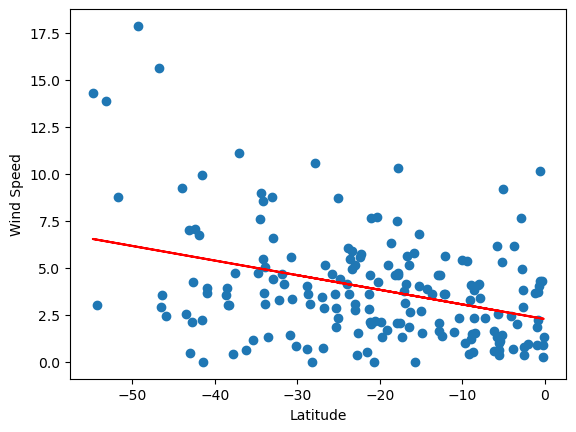

r-value: -0.35992772558110436


In [53]:
# Southern Hemisphere
calculate_linereg(x=southern_hemi_df['Lat'], y=southern_hemi_df['Wind Speed'], annotate_x_pos=-55, annotate_y_pos=38, xlabel='Latitude', ylabel='Wind Speed')


**Discussion about the linear relationship:** The nothern hemisphere shows very weak positive correlation while the southern shows weak negative correlation. In combination these graphs show there is a weak correlation of wind speed being lower as latitude samples approach the equator (lat 0)